<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autoenkodery" data-toc-modified-id="Autoenkodery-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autoenkodery</a></span><ul class="toc-item"><li><span><a href="#Dane:-MNIST-784" data-toc-modified-id="Dane:-MNIST-784-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dane: MNIST 784</a></span></li><li><span><a href="#Najprostszy-autoenkoder" data-toc-modified-id="Najprostszy-autoenkoder-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Najprostszy autoenkoder</a></span></li><li><span><a href="#Trening" data-toc-modified-id="Trening-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Trening</a></span></li><li><span><a href="#Wizualizacja-wyniku" data-toc-modified-id="Wizualizacja-wyniku-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Wizualizacja wyniku</a></span></li><li><span><a href="#Autoenkoder-zawierający-model-kodera-i-dekodera" data-toc-modified-id="Autoenkoder-zawierający-model-kodera-i-dekodera-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Autoenkoder zawierający model kodera i dekodera</a></span></li><li><span><a href="#Trening" data-toc-modified-id="Trening-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Trening</a></span></li><li><span><a href="#Wizualizacja-rekonstrukcji" data-toc-modified-id="Wizualizacja-rekonstrukcji-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Wizualizacja rekonstrukcji</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenia:" data-toc-modified-id="Ćwiczenia:-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Ćwiczenia:</a></span></li></ul></li><li><span><a href="#Splotowy-autoenkoder-do-obrazów" data-toc-modified-id="Splotowy-autoenkoder-do-obrazów-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Splotowy autoenkoder do obrazów</a></span></li><li><span><a href="#Warstwy-UpSampling2D-i-Conv2DTransose" data-toc-modified-id="Warstwy-UpSampling2D-i-Conv2DTransose-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Warstwy UpSampling2D i Conv2DTransose</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Ćwiczenie</a></span></li></ul></li><li><span><a href="#Variational-autoencoder-(VAE)" data-toc-modified-id="Variational-autoencoder-(VAE)-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Variational autoencoder (VAE)</a></span></li><li><span><a href="#Warstwa-próbkująca" data-toc-modified-id="Warstwa-próbkująca-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Warstwa próbkująca</a></span></li><li><span><a href="#Encoder" data-toc-modified-id="Encoder-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Encoder</a></span></li><li><span><a href="#Dekoder" data-toc-modified-id="Dekoder-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Dekoder</a></span></li><li><span><a href="#Przeciążanie-klasy-Model" data-toc-modified-id="Przeciążanie-klasy-Model-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>Przeciążanie klasy Model</a></span></li><li><span><a href="#Trening-VAE" data-toc-modified-id="Trening-VAE-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Trening VAE</a></span></li><li><span><a href="#Wizualizacja-rekonstrukcji" data-toc-modified-id="Wizualizacja-rekonstrukcji-1.16"><span class="toc-item-num">1.16&nbsp;&nbsp;</span>Wizualizacja rekonstrukcji</a></span></li><li><span><a href="#Geneorowanie-cyfr" data-toc-modified-id="Geneorowanie-cyfr-1.17"><span class="toc-item-num">1.17&nbsp;&nbsp;</span>Geneorowanie cyfr</a></span></li><li><span><a href="#Wizualizacja-przestrzeni-generowanych-cyfr" data-toc-modified-id="Wizualizacja-przestrzeni-generowanych-cyfr-1.18"><span class="toc-item-num">1.18&nbsp;&nbsp;</span>Wizualizacja przestrzeni generowanych cyfr</a></span></li><li><span><a href="#Wizualizacja-skupisk-cyfr-w-przestrzeni-utajonej" data-toc-modified-id="Wizualizacja-skupisk-cyfr-w-przestrzeni-utajonej-1.19"><span class="toc-item-num">1.19&nbsp;&nbsp;</span>Wizualizacja skupisk cyfr w przestrzeni utajonej</a></span></li><li><span><a href="#Zadanie:-autoenkoder-czyszczący-dokumenty" data-toc-modified-id="Zadanie:-autoenkoder-czyszczący-dokumenty-1.20"><span class="toc-item-num">1.20&nbsp;&nbsp;</span>Zadanie: autoenkoder czyszczący dokumenty</a></span></li></ul></li></ul></div>

# Autoenkodery

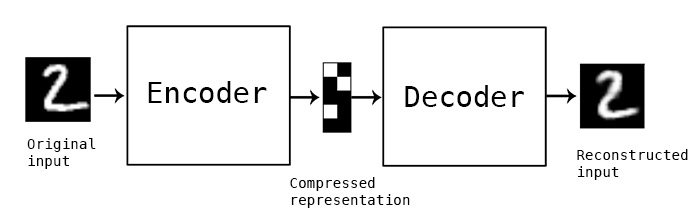


  * Autoenkoder niekompletny
  * Autoenkodery głębokie ze splotem 2D
  * VAE autoenkoder wariacyjny 

## Dane: MNIST 784

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

## Najprostszy autoenkoder

  * jedna warstwa ukryta o wielkości mniejszej niż wejście (``encoding_dim=32``)
  * warstwa wyjściowa z sigmoidalną funkcją aktywacji 
  * wyjście w zakresie (0,1) więc można użyć funkcję kosztu binarna entropia krzyżowa

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

encoding_dim = 32  

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

## Trening

In [ ]:
autoencoder.fit(x_train, x_train, epochs=2, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

history = autoencoder.history.history

plt.plot(history['loss'], '-r', label="Training")
plt.plot(history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.show()

score = autoencoder.evaluate(x_test, x_test, verbose=0)
print('Test loss:', score[0])

## Wizualizacja wyniku

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
fig, axs = plt.subplots(2, n, figsize=(n*2, 4))

for i in range(n):
    axs[0, i].imshow(x_test[i].reshape(28, 28), cmap='Greys')
    axs[0, i].set_axis_off()
    axs[1, i].imshow(decoded_imgs[i].reshape(28, 28), cmap='Greys')
    axs[1, i].set_axis_off()
   
plt.show()

## Autoenkoder zawierający model kodera i dekodera

In [ ]:
tensorflow.keras.backend.clear_session()
encoding_dim = 10  

encoder_input = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(encoder_input)
encoder = Model(encoder_input, encoded, name='encoder')
encoder.summary()

In [ ]:
decoder_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(decoder_input)
decoder = Model(decoder_input, decoded, name='decoder')
decoder.summary()

In [ ]:
autoencoder_input = Input(shape=(784,))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

## Trening

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

import matplotlib.pyplot as plt
history = autoencoder.history.history
plt.plot(history['loss'], '-r', label="Training")
plt.plot(history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.show()

score = autoencoder.evaluate(x_test, x_test, verbose=0)
print('Test loss:', score[0])

## Wizualizacja rekonstrukcji

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
fig, axs = plt.subplots(2, n, figsize=(n*2, 4))
for i in range(n):
    axs[0, i].imshow(x_test[i].reshape(28, 28), cmap='Greys')
    axs[0, i].set_axis_off()
    axs[1, i].imshow(decoded_imgs[i].reshape(28, 28), cmap='Greys')
    axs[1, i].set_axis_off()
plt.show()

### Ćwiczenia:

  * przeprowadź trening autoenkodera z jedną warstwą ukrytą dla różnych wartości ``encodeing_dim`` i porównaj uzyskane wyniki. Jaka wielkość warstwy kodującej jest wystarczająca dla danych MNIST?
  * sprawdź jakość rekonstrukcji obrazów, gdy zrezyknujemy z nieliniowej aktywacji w warstwie kodującej
  * zbuduj (głeboki) autoenkoder posiadający 2 neurony na wyjściu kodera. Przedstaw wizualizację 2D rozkładu danych testowych (wykres rozrzutu) skompresowanych przez koder.

## Splotowy autoenkoder do obrazów


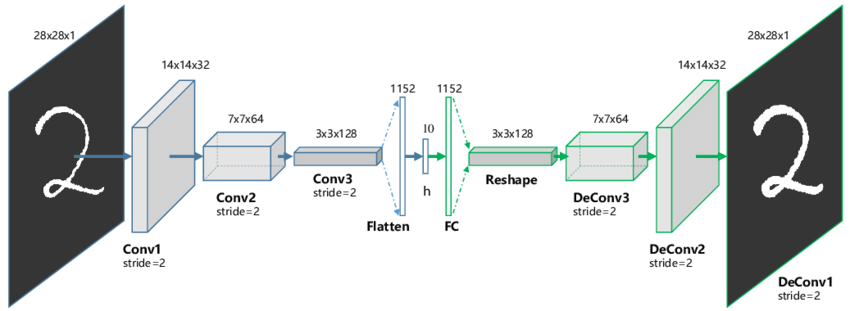

Koder: 
* Conv2D, 
* MaxPooling2D

Dekoder:
* [Conv2DTransose](https://keras.io/api/layers/convolution_layers/convolution2d_transpose/)
* [UpSampling2D](https://keras.io/api/layers/reshaping_layers/up_sampling2d/)

Rozmiar warstwy wyjściowej musi być taki sam jak wymiar wejścia


## Warstwy UpSampling2D i Conv2DTransose

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose

tf.keras.backend.clear_session()

inputs = Input(shape=(16, 16, 1))
x = Conv2D(16, 3, activation="relu")(inputs)
x = MaxPooling2D( 3 )(x)

x = Conv2DTranspose(16, (5, 5), activation="relu")(x)
x = UpSampling2D(2)(x)

autoencoder = Model(inputs, x)
autoencoder.summary()

### Ćwiczenie

Zbuduj głeboki autoencoder z warstwami splotowymi na danych MNIST i porównaj wynik z porzednimi modelami.

## Variational autoencoder (VAE)

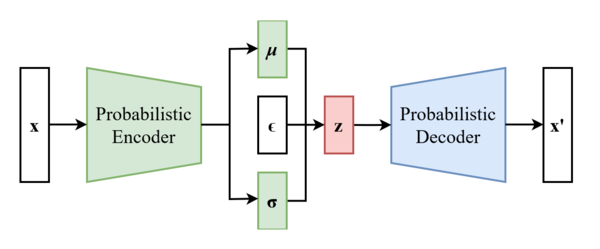

Zobacz: https://keras.io/examples/generative/vae/



1. Warstwa próbkująca $\mathbf{z} \sim \mathcal{N}(\mu_\mathbf{x}, \sigma_\mathbf{x})$ 
2. Funkcja kosztu VAE:

$$
    \mathcal{L}(\theta, \phi) = \mathbb{E}_{\mathbf{x} \in \mathcal{D}, \xi \sim \mathcal{N}(0, 1)} [ - \log p_\theta(\mathbf{\mu_x} + \mathbf{\sigma_x} \, \xi) + \dfrac{1}{2} \, \sum_{k=1}^K (\mathbf{\sigma_x} + \mathbf{\mu_x}^2 -1 - \log \mathbf{\sigma_x})]
$$





## Warstwa próbkująca

**Reparameterization trick**: warstwa próbkująca realizuje 
        $$\mathbf{z} = \mu + \sigma \, \xi$$ gdzie $\xi$ pochodzi z rozkładu normalnego $\mathcal{N}(0, 1)$. 

Implementacja wałasnej warstwy w Keras
* dziedziczenie klasy ``Layer`` i przeciążenie metody ``call(inputs)`` 
* dwa wejścia do warstwy $\mu$ i $\sigma$, wektory o tej samej długości (``latent_dim``)
* wyjście ``z_log_var`` reprezentuje $2 \log{\sigma}$ zamiast $\sigma$, dzieki czemu możliwe wartosci ujemne i dodatnie

In [ ]:
class Sampling(tf.keras.layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

## Encoder

Trzy wyjścia: ``[z_mean, z_log_var, z]`` 


In [ ]:
from tensorflow.keras.layers import Flatten
latent_dim = 2

tf.keras.backend.clear_session()

encoder_inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = Flatten()(x)
x = Dense(16, activation="relu")(x)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()



## Dekoder 

* wejście o rozmiarze ``latent_dim`` (próbkowane)
* wyjście o rozmiarze ``[28, 28, 1]``, zrekontruowany obraz 

In [ ]:
from tensorflow.keras.layers import Reshape

latent_inputs = Input(shape=(latent_dim,))
x = Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

## Przeciążanie klasy Model

Dywergencja Kullbacka–Leiblera (``kl_loss``) jest funkcją regularyzującą zależną od wyjścia z kodera, dlatego nie może być bezpośrednio użyta w metodzie ``compile()`` przy konfiguracji modelu. 

Rozwiązania:
* metoda warstwy lub modelu ``add_loss()`` pozwala dodać własna funkjcą regularyzacyjną zależną od wyjścia warstwy
* dociążenie metody ``train_step`` modelu pozwala zdefiniować dowolną procedurę uczenia oraz własne funkcje kosztu

In [ ]:
class CustomModel(Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        # track losses
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [ self.loss_tracker ]

    # krok uczenia, data zwieta paczkę danych data=(X, Y)
    def train_step(self, data):
        
        with tf.GradientTape() as tape:
            X, Y = data
            y_pred = self.predict(X)
            loss = tf.reduce_sum(tf.keras.losses.binary_crossentropy(Y, y_pred), axis=(1, 2))
            
        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.loss.update_state(loss)
        
        return { "loss": self.loss_tracker.result() }

In [ ]:
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        
        self.encoder = encoder
        self.decoder = decoder
        
        # track losses
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            X, Y = data
            z_mean, z_log_var, z = self.encoder(X)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(Y, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
            
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

## Trening VAE

In [ ]:
vae = VAE(encoder, decoder)

x_train = np.reshape(x_train , [len(x_train), 28, 28, 1] )

vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
vae.fit(x_train, x_train, epochs=30, batch_size=128)

history = vae.history.history

plt.plot(history['loss'], '-r', label="Training loss")
plt.plot(history['reconstruction_loss'], '-b', label="Reconstruction loss")
plt.plot(history['kl_loss'], '-g', label="KL Loss")
plt.xlabel('Epoch #')
plt.legend()
plt.show()

## Wizualizacja rekonstrukcji

In [ ]:
x_test = np.reshape(x_test , [len(x_test), 28, 28, 1] )

z_mean, z_log_var, z = vae.encoder.predict(x_test)
decoded_imgs = vae.decoder.predict(z)

n = 10
fig, axs = plt.subplots(2, n, figsize=(n*2, 4))

for i in range(n):
    axs[0, i].imshow(x_test[i].reshape(28, 28), cmap='Greys')
    axs[0, i].set_axis_off()
    axs[1, i].imshow(decoded_imgs[i].reshape(28, 28), cmap='Greys')
    axs[1, i].set_axis_off()
    
plt.show()

## Geneorowanie cyfr

In [ ]:
z_sample = [[ 1.0, 0.5]]

x_decoded = vae.decoder.predict(z_sample)
digit = x_decoded[0].reshape(28, 28)
plt.imshow(digit, cmap="Greys")
plt.show()

## Wizualizacja przestrzeni generowanych cyfr

In [ ]:
n = 30
digit_size = 28
scale = 2

figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-scale, scale, n)
grid_y = np.linspace(-scale, scale, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample, verbose=0);
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
        ] = digit

plt.figure(figsize=(15, 15))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(figure, cmap="Greys")
plt.show()

## Wizualizacja skupisk cyfr w przestrzeni utajonej

In [ ]:
z_mean, _, _ = vae.encoder.predict(x_train)
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels_train)
plt.colorbar()
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

## Zadanie: autoenkoder czyszczący dokumenty

Katalog [dane/document_denoising/](dane/document_denoising/) zawiera obrazy (skany) zawierające próbki tekstu wraz z różnorodnymi zniekształceniami.  
Zadanie polega na zbudowaniu modelu usuwającego zniekształcenia z obrazów.  
Dane treningowe zawarte w podkatalogu ``dane/document_denoising/train/`` zawierają 144 obrazów o maksymalnym rozmiarze  420x540.

![dane/document_denoising/train/2.png](dane/document_denoising/train/2.png)

W katalogu ``dane/document_denoising/train_cleaned/`` znajdują się odpowiadające im obrazy bez zniekształceń.  
![dane/document_denoising/train_cleaned/2.png](dane/document_denoising/train_cleaned/2.png)

Zbuduj głęboki autoenkoder z warstwami splotowymi o jak najlepszej jakości usuwania zniekształceń i zastosuj go na 4 obrazach testowych znajdujących się w katalogu ``dane/document_denoising/test/``.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

data_path = 'dane/document_denoising/'
train_img = sorted(os.listdir(data_path + 'train/'))

target_size = (420, 540)

def process_image(path, target_size=target_size):
    
    image = tf.keras.utils.load_img(path, color_mode="grayscale", target_size=target_size )
    return tf.keras.utils.img_to_array(image)


train, train_cleaned = [], []

for f in train_img:
    train.append(process_image(data_path + 'train/' + f))
    train_cleaned.append(process_image(data_path + 'train_cleaned/' + f))

X = np.asarray(train)
Y = np.asarray(train_cleaned)

print('X shape:', X.shape)
print('Y shape:', Y.shape)

In [ ]:
n_img = 4
fig, axs = plt.subplots(n_img, 2, figsize=(15, n_img*5))
for i in range(n_img):
    axs[i, 0].imshow(X[i], cmap='gray')
    axs[i, 0].set_title(f'Zaszumiony obraz: {train_img[i]}')
    axs[i, 1].imshow(Y[i], cmap='gray')
    axs[i, 1].set_title(f'Obraz bez szumu: {train_img[i]}')
plt.show()